c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


accuracy -->  0.9000332115576221
precision -->  0.03557312252964427
recall -->  0.13636363636363635


c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-4-5748c0dfd150>:137: RuntimeWarning: invalid value encountered in longlong_scalars
  model_precision = TP / (TP + FP)
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\pyt

Random Forest accuracy ==>  0.9901025125894105
Random Forest precision ==>  0.8607596372201529
Random Forest recall ==>  0.6566095938058855
Decision Tree accuracy ==>  0.9851211747984647
Decision Tree precision ==>  0.6823675157794151
Decision Tree recall ==>  0.7094543804821938
AdaBoost accuracy ==>  0.9778774590285948
AdaBoost precision ==>  0.5017418546365915
AdaBoost recall ==>  0.1665330956571366
Support Vector Machine accuracy ==>  0.8878488675319464
Support Vector Machine precision ==>  0.34779063878568817
Support Vector Machine recall ==>  0.17294753377713737
Gaussian Naive Bayes accuracy ==>  0.5102669385045754
Gaussian Naive Bayes precision ==>  0.04002279988907057
Gaussian Naive Bayes recall ==>  0.9185531383980873
Neural Network accuracy ==>  0.9764166573861
Neural Network precision ==>  nan
Neural Network recall ==>  0.03417642140468228
K-Neighbours Classifier accuracy ==>  0.9783422445151851
K-Neighbours Classifier precision ==>  0.5358747464503043
K-Neighbours Classifier

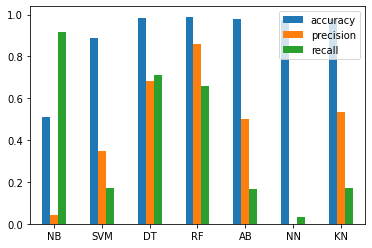

In [4]:
# Step 1 import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


# Step 2 read the csv files and create pandas dataframes
legitimate_df = pd.read_excel("structured_data_legitimate.xlsx")
phishing_df = pd.read_excel("structured_data_phishing.xlsx")


# Step 3 combine legitimate and phishing dataframes, and shuffle
df = pd.concat([legitimate_df, phishing_df], axis=0)

df = df.sample(frac=1)


# Step 4 remove'url' and remove duplicates, then we can create X and Y for the models, Supervised Learning
df = df.drop('URL', axis=1)

df = df.drop_duplicates()

X = df.drop('label', axis=1)
Y = df['label']


# Step 5 split data to train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


# Step 6 create a ML model using sklearn
svm_model = svm.LinearSVC()

# Random Forest
rf_model = RandomForestClassifier(n_estimators=60)

# Decision Tree
dt_model = tree.DecisionTreeClassifier()

# AdaBoost
ab_model = AdaBoostClassifier()

# Gaussian Naive Bayes
nb_model = GaussianNB()

# Neural Network
nn_model = MLPClassifier(alpha=1)

# KNeighborsClassifier
kn_model = KNeighborsClassifier()

# Gaussian Process
#gp_model = GaussianProcessClassifier(1.0 * RBF(1.0))

# Step 7 train the model
svm_model.fit(x_train, y_train)


# Step 8 make some predictions using test data
predictions = svm_model.predict(x_test)


# Step 9 create a confusion matrix and tn, tp, fn , fp
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=predictions).ravel()


# Step 10 calculate accuracy, precision and recall scores
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("accuracy --> ", accuracy)
print("precision --> ", precision)
print("recall --> ", recall)


# K-fold cross validation, and K = 5
K = 5
total = X.shape[0]
index = int(total / K)

# 1
X_1_test = X.iloc[:index]
X_1_train = X.iloc[index:]
Y_1_test = Y.iloc[:index]
Y_1_train = Y.iloc[index:]

# 2
X_2_test = X.iloc[index:index*2]
X_2_train = X.iloc[np.r_[:index, index*2:]]
Y_2_test = Y.iloc[index:index*2]
Y_2_train = Y.iloc[np.r_[:index, index*2:]]

# 3
X_3_test = X.iloc[index*2:index*3]
X_3_train = X.iloc[np.r_[:index*2, index*3:]]
Y_3_test = Y.iloc[index*2:index*3]
Y_3_train = Y.iloc[np.r_[:index*2, index*3:]]

# 4
X_4_test = X.iloc[index*3:index*4]
X_4_train = X.iloc[np.r_[:index*3, index*4:]]
Y_4_test = Y.iloc[index*3:index*4]
Y_4_train = Y.iloc[np.r_[:index*3, index*4:]]

# 5
X_5_test = X.iloc[index*4:]
X_5_train = X.iloc[:index*4]
Y_5_test = Y.iloc[index*4:]
Y_5_train = Y.iloc[:index*4]


# X and Y train and test lists
X_train_list = [X_1_train, X_2_train, X_3_train, X_4_train, X_5_train]
X_test_list = [X_1_test, X_2_test, X_3_test, X_4_test, X_5_test]

Y_train_list = [Y_1_train, Y_2_train, Y_3_train, Y_4_train, Y_5_train]
Y_test_list = [Y_1_test, Y_2_test, Y_3_test, Y_4_test, Y_5_test]


def calculate_measures(TN, TP, FN, FP):
    model_accuracy = (TP + TN) / (TP + TN + FN + FP)
    model_precision = TP / (TP + FP)
    model_recall = TP / (TP + FN)
    return model_accuracy, model_precision, model_recall


rf_accuracy_list, rf_precision_list, rf_recall_list = [], [], []
dt_accuracy_list, dt_precision_list, dt_recall_list = [], [], []
ab_accuracy_list, ab_precision_list, ab_recall_list = [], [], []
svm_accuracy_list, svm_precision_list, svm_recall_list = [], [], []
nb_accuracy_list, nb_precision_list, nb_recall_list = [], [], []
nn_accuracy_list, nn_precision_list, nn_recall_list = [], [], []
kn_accuracy_list, kn_precision_list, kn_recall_list = [], [], []
#gp_accuracy_list, gp_precision_list, gp_recall_list = [], [], []


for i in range(0, K):
    # ----- RANDOM FOREST ----- #
    rf_model.fit(X_train_list[i], Y_train_list[i])
    rf_predictions = rf_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=rf_predictions).ravel()
    rf_accuracy, rf_precision, rf_recall = calculate_measures(tn, tp, fn, fp)
    rf_accuracy_list.append(rf_accuracy)
    rf_precision_list.append(rf_precision)
    rf_recall_list.append(rf_recall)

    # ----- DECISION TREE ----- #
    dt_model.fit(X_train_list[i], Y_train_list[i])
    dt_predictions = dt_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=dt_predictions).ravel()
    dt_accuracy, dt_precision, dt_recall = calculate_measures(tn, tp, fn, fp)
    dt_accuracy_list.append(dt_accuracy)
    dt_precision_list.append(dt_precision)
    dt_recall_list.append(dt_recall)

    # ----- SUPPORT VECTOR MACHINE ----- #
    svm_model.fit(X_train_list[i], Y_train_list[i])
    svm_predictions = svm_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=svm_predictions).ravel()
    svm_accuracy, svm_precision, svm_recall = calculate_measures(tn, tp, fn, fp)
    svm_accuracy_list.append(svm_accuracy)
    svm_precision_list.append(svm_precision)
    svm_recall_list.append(svm_recall)

    # ----- ADABOOST ----- #
    ab_model.fit(X_train_list[i], Y_train_list[i])
    ab_predictions = ab_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=ab_predictions).ravel()
    ab_accuracy, ab_precision, ab_recall = calculate_measures(tn, tp, fn, fp)
    ab_accuracy_list.append(ab_accuracy)
    ab_precision_list.append(ab_precision)
    ab_recall_list.append(ab_recall)

    # ----- GAUSSIAN NAIVE BAYES ----- #
    nb_model.fit(X_train_list[i], Y_train_list[i])
    nb_predictions = nb_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=nb_predictions).ravel()
    nb_accuracy, nb_precision, nb_recall = calculate_measures(tn, tp, fn, fp)
    nb_accuracy_list.append(nb_accuracy)
    nb_precision_list.append(nb_precision)
    nb_recall_list.append(nb_recall)

    # ----- NEURAL NETWORK ----- #
    nn_model.fit(X_train_list[i], Y_train_list[i])
    nn_predictions = nn_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=nn_predictions).ravel()
    nn_accuracy, nn_precision, nn_recall = calculate_measures(tn, tp, fn, fp)
    nn_accuracy_list.append(nn_accuracy)
    nn_precision_list.append(nn_precision)
    nn_recall_list.append(nn_recall)

    # ----- K-NEIGHBOURS CLASSIFIER ----- #
    kn_model.fit(X_train_list[i], Y_train_list[i])
    kn_predictions = kn_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=kn_predictions).ravel()
    kn_accuracy, kn_precision, kn_recall = calculate_measures(tn, tp, fn, fp)
    kn_accuracy_list.append(kn_accuracy)
    kn_precision_list.append(kn_precision)
    kn_recall_list.append(kn_recall)

    """
    # ----- GAUSSIAN PROCESS ----- #
    gp_model.fit(X_train_list[i], Y_train_list[i])
    gp_predictions = gp_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=gp_predictions).ravel()
    gp_accuracy, gp_precision, gp_recall = calculate_measures(tn, tp, fn, fp)
    gp_accuracy_list.append(gp_accuracy)
    gp_precision_list.append(gp_precision)
    gp_recall_list.append(gp_recall)
    """

RF_accuracy = sum(rf_accuracy_list) / len(rf_accuracy_list)
RF_precision = sum(rf_precision_list) / len(rf_precision_list)
RF_recall = sum(rf_recall_list) / len(rf_recall_list)

print("Random Forest accuracy ==> ", RF_accuracy)
print("Random Forest precision ==> ", RF_precision)
print("Random Forest recall ==> ", RF_recall)


DT_accuracy = sum(dt_accuracy_list) / len(dt_accuracy_list)
DT_precision = sum(dt_precision_list) / len(dt_precision_list)
DT_recall = sum(dt_recall_list) / len(dt_recall_list)

print("Decision Tree accuracy ==> ", DT_accuracy)
print("Decision Tree precision ==> ", DT_precision)
print("Decision Tree recall ==> ", DT_recall)


AB_accuracy = sum(ab_accuracy_list) / len(ab_accuracy_list)
AB_precision = sum(ab_precision_list) / len(ab_precision_list)
AB_recall = sum(ab_recall_list) / len(ab_recall_list)

print("AdaBoost accuracy ==> ", AB_accuracy)
print("AdaBoost precision ==> ", AB_precision)
print("AdaBoost recall ==> ", AB_recall)


SVM_accuracy = sum(svm_accuracy_list) / len(svm_accuracy_list)
SVM_precision = sum(svm_precision_list) / len(svm_precision_list)
SVM_recall = sum(svm_recall_list) / len(svm_recall_list)

print("Support Vector Machine accuracy ==> ", SVM_accuracy)
print("Support Vector Machine precision ==> ", SVM_precision)
print("Support Vector Machine recall ==> ", SVM_recall)


NB_accuracy = sum(nb_accuracy_list) / len(nb_accuracy_list)
NB_precision = sum(nb_precision_list) / len(nb_precision_list)
NB_recall = sum(nb_recall_list) / len(nb_recall_list)

print("Gaussian Naive Bayes accuracy ==> ", NB_accuracy)
print("Gaussian Naive Bayes precision ==> ", NB_precision)
print("Gaussian Naive Bayes recall ==> ", NB_recall)


NN_accuracy = sum(nn_accuracy_list) / len(nn_accuracy_list)
NN_precision = sum(nn_precision_list) / len(nn_precision_list)
NN_recall = sum(nn_recall_list) / len(nn_recall_list)

print("Neural Network accuracy ==> ", NN_accuracy)
print("Neural Network precision ==> ", NN_precision)
print("Neural Network recall ==> ", NN_recall)


KN_accuracy = sum(kn_accuracy_list) / len(kn_accuracy_list)
KN_precision = sum(kn_precision_list) / len(kn_precision_list)
KN_recall = sum(kn_recall_list) / len(kn_recall_list)

print("K-Neighbours Classifier accuracy ==> ", KN_accuracy)
print("K-Neighbours Classifier precision ==> ", KN_precision)
print("K-Neighbours Classifier recall ==> ", KN_recall)
"""
GP_accuracy = sum(gp_accuracy_list) / len(gp_accuracy_list)
GP_precision = sum(gp_precision_list) / len(gp_precision_list)
GP_recall = sum(gp_recall_list) / len(gp_recall_list)
print("Gaussian Process accuracy ==> ", GP_accuracy)
print("Gaussian Process precision ==> ", GP_precision)
print("Gaussian Process recall ==> ", GP_recall)
"""

data = {'accuracy': [NB_accuracy, SVM_accuracy, DT_accuracy, RF_accuracy, AB_accuracy, NN_accuracy, KN_accuracy],
        'precision': [NB_precision, SVM_precision, DT_precision, RF_precision, AB_precision, NN_precision, KN_precision],
        'recall': [NB_recall, SVM_recall, DT_recall, RF_recall, AB_recall, NN_recall, KN_recall]
        }

index = ['NB', 'SVM', 'DT', 'RF', 'AB', 'NN', 'KN']

df_results = pd.DataFrame(data=data, index=index)


# visualize the dataframe
ax = df_results.plot.bar(rot=0)
plt.show()































In [17]:
    model=nb_model.fit(X_train_list[i], Y_train_list[i])
    dt_predictions = dt_model.predict(X_test_list[i])

In [18]:
import pickle as pkl

In [19]:
pkl.dump(model,open("nb_model.pkl","wb"))

In [20]:
dt_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)